In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

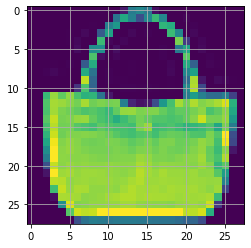

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

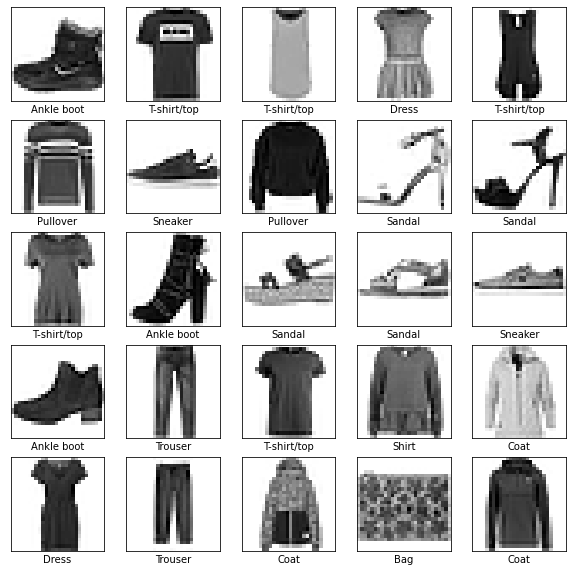

In [7]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
layers = [keras.layers.Flatten(input_shape=(28,28)),
          keras.layers.Dense(128, activation=tf.nn.relu),
          keras.layers.Dense(10, activation=tf.nn.softmax)]
# model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])


In [9]:
model = keras.Sequential(layers)

2021-10-26 12:34:53.679590: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-10-26 12:34:53.686499: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2904000000 Hz
2021-10-26 12:34:53.686719: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557b2eecb9f0 executing computations on platform Host. Devices:
2021-10-26 12:34:53.686733: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=5)

2021-10-26 12:34:53.775764: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4926 - accuracy: 0.8283
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3750 - accuracy: 0.8630
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3345 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3118 - accuracy: 0.8853
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2928 - accuracy: 0.8927


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy  0.8753


In [13]:
predictions = model.predict(test_images)

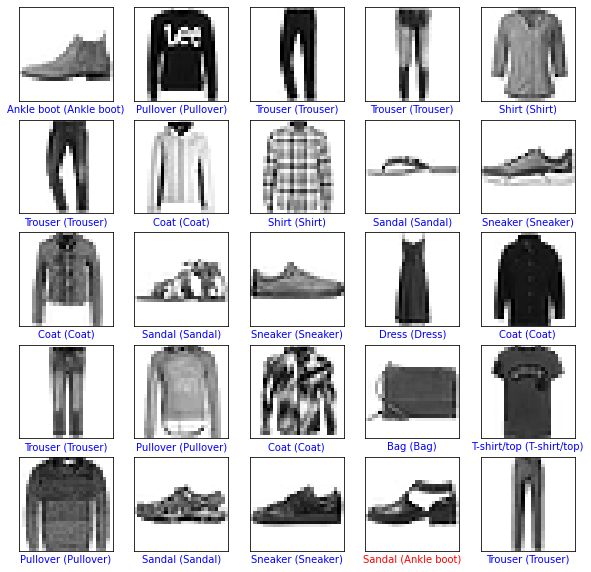

In [20]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color=color)